## Top 20 True Words

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt

In [3]:
fake_df = pd.read_csv(r"True.csv", sep=',')
fake_df.sample(10)

,title,text,subject,date
19044,Supporters of South Korea ex-leader Park ask U...,SEOUL (Reuters) - Supporters of former South K...,worldnews,"September 26, 2017"
12935,"Thousands march in Helsinki in far-right, anti...",HELSINKI (Reuters) - Supporters of the far rig...,worldnews,"December 6, 2017"
10152,U.S. lawmakers want health agencies to lower p...,(Reuters) - A group of lawmakers is calling on...,politicsNews,"March 29, 2016"
4103,Top U.S. officials to testify in Trump-Russia ...,WASHINGTON (Reuters) - The U.S. House of Repre...,politicsNews,"April 21, 2017"
7460,EU eyes more self-reliance after Trump victory,BRUSSELS (Reuters) - The European Union must t...,politicsNews,"November 9, 2016"
9387,States ratchet up transgender battle with laws...,(Reuters) - Officials from 11 U.S. states sued...,politicsNews,"May 25, 2016"
18802,Tunisia foils the departure of 555 migrants to...,TUNIS (Reuters) - The Tunisian navy has arrest...,worldnews,"September 28, 2017"
19434,Union protests against French labor reform los...,PARIS (Reuters) - Far-left trade unionists mar...,worldnews,"September 21, 2017"
5330,Trump to reverse Obama-era environmental rules...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"February 21, 2017"
8106,Clinton condemns 'apparent terrorist attacks' ...,WASHINGTON (Reuters) - Democratic presidential...,politicsNews,"September 18, 2016"


In [4]:
# 2. Initialize the Vectorizer
# stop_words='english' removes common words like 'the', 'is', 'and'
vectorizer = CountVectorizer(stop_words='english',binary=True)
# 3. Fit and Transform the text data
# This creates a sparse matrix (efficient storage)
matrix = vectorizer.fit_transform(fake_df['title']+fake_df['text'])


In [5]:
# 4. Convert back to a DataFrame (for readability/analysis)
# We use vectorizer.get_feature_names_out() to get column headers
sparse_df = pd.DataFrame.sparse.from_spmatrix(
    matrix, 
    columns=vectorizer.get_feature_names_out()
)
sparse_df.sample(5)


,00,000,0000,00004,000063,000270,00042,0005,0009,000938,...,zwak,zweig,zweiman,zweli,zwolinski,zynga,zypries,zyries,zyuganov,émigré
1238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5634,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9284,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
freq_items = apriori(sparse_df, min_support=0.2, use_colnames=True, max_len=1)
freq_items_sorted = freq_items.sort_values(by='support', ascending=False)
top_20_freq_items = freq_items_sorted.head(20)
top_20_freq_items

C:\Users\ibrahima\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
28,0.998179,(reuters)
29,0.936639,(said)
25,0.609983,(president)
41,0.448896,(trump)
6,0.434421,(donald)
40,0.431947,(told)
34,0.402251,(state)
10,0.393192,(government)
47,0.389971,(year)
18,0.379185,(new)


C:\Users\ibrahima\AppData\Local\Temp\ipykernel_7744\2203977660.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_freq_items['itemsets_str'] = top_20_freq_items['itemsets'].apply(lambda x: ', '.join(list(x)))


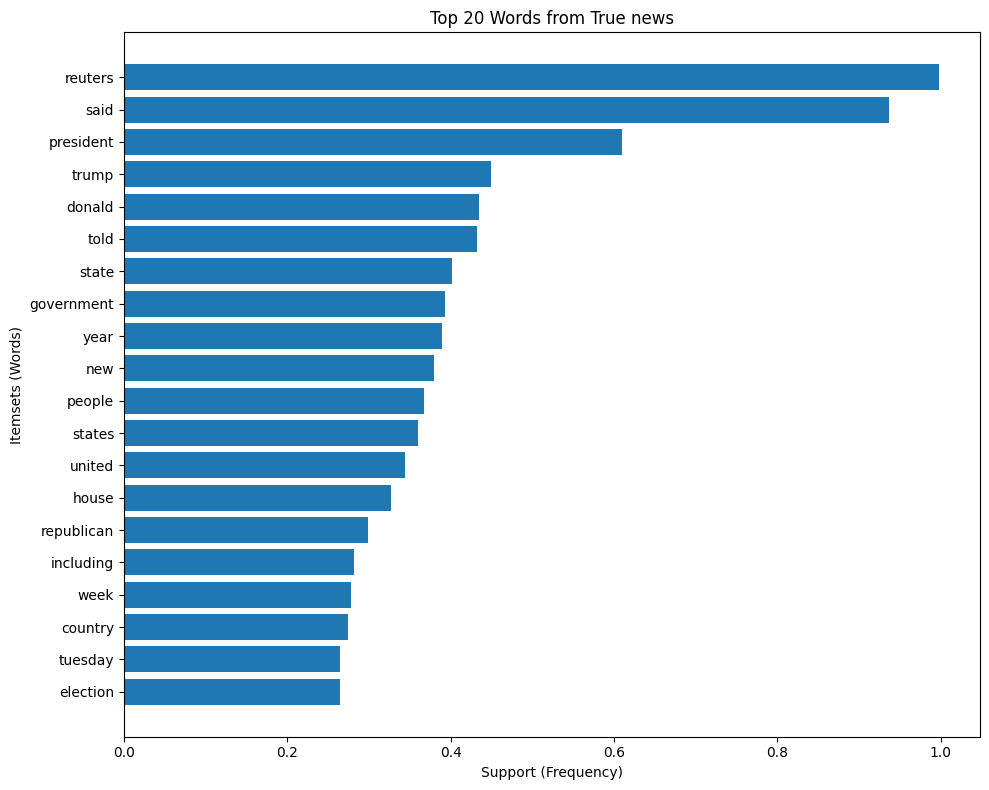

In [7]:
# 4. Create a Bar Plot
plt.figure(figsize=(10, 8))
top_20_freq_items['itemsets_str'] = top_20_freq_items['itemsets'].apply(lambda x: ', '.join(list(x)))
plt.barh(top_20_freq_items['itemsets_str'], top_20_freq_items['support'])
plt.xlabel('Support (Frequency)')
plt.ylabel('Itemsets (Words)')
plt.title('Top 20 Words from True news')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()